In [1]:
import torch

<h2><b>Splitting high quality dataset </b></h2>

In [4]:
import os
import shutil

def split_hq_dataset(hq_folder, train_folder, test_folder, train_count=7500, test_count=1000):
    """
    Split HQ dataset into training and testing sets.

    Args:
        hq_folder (str): Path to the raw HQ dataset.
        train_folder (str): Path to store training images.
        test_folder (str): Path to store testing images.
        train_count (int): Number of training images.
        test_count (int): Number of testing images.
    """
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Get only files from the HQ folder
    images = [f for f in sorted(os.listdir(hq_folder)) if os.path.isfile(os.path.join(hq_folder, f))]
    train_images = images[:train_count]
    test_images = images[-test_count:]

    # Copy training images
    for img_name in train_images:
        shutil.copy(os.path.join(hq_folder, img_name), os.path.join(train_folder, img_name))
    
    # Copy testing images
    for img_name in test_images:
        shutil.copy(os.path.join(hq_folder, img_name), os.path.join(test_folder, img_name))

# Paths for HQ dataset
hq_folder = "ffhq/ffhq256"
hq_train_folder = "datasets/HQ_Train"
hq_test_folder = "datasets/HQ_Test"

# Split HQ dataset
split_hq_dataset(hq_folder, hq_train_folder, hq_test_folder)


<h2><b>Splitting and degradation of low quality dataset </b></h2>

In [10]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import shutil

def apply_degradation(image, degradation_type="mild"):
    """
    Apply degradation to a single image.
    
    Args:
        image (numpy.ndarray): Input image as a NumPy array.
        degradation_type (str): Type of degradation ("mild", "moderate", "severe").
        
    Returns:
        numpy.ndarray: Degraded image.
    """
    if degradation_type == "mild":
        # JPEG compression
        _, compressed = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        degraded = cv2.imdecode(compressed, cv2.IMREAD_COLOR)
    
    elif degradation_type == "moderate":
        # Gaussian noise
        noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
        degraded = cv2.add(image, noise)
    
    elif degradation_type == "severe":
        # Gaussian blur
        blurred = cv2.GaussianBlur(image, (7, 7), 5)
        # Add Gaussian noise
        noise = np.random.normal(0, 15, blurred.shape).astype(np.uint8)
        degraded = cv2.add(blurred, noise)
    
    else:
        raise ValueError("Invalid degradation type. Choose from 'mild', 'moderate', or 'severe'.")
    
    return degraded

def process_lq_dataset(input_folder, train_folder, test_folder, train_count=7211, test_count=967, degradation_type="mild"):
    """
    Process and split the LQ dataset by applying degradation and storing in train/test folders.
    
    Args:
        input_folder (str): Path to the input CelebAHQ images.
        train_folder (str): Path to store training images.
        test_folder (str): Path to store testing images.
        train_count (int): Number of training images.
        test_count (int): Number of testing images.
        degradation_type (str): Type of degradation ("mild", "moderate", "severe").
    """
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    images = sorted(os.listdir(input_folder))
    train_images = images[:train_count]
    test_images = images[-test_count:]

    # Process training images
    for img_name in tqdm(train_images, desc=f"Processing {degradation_type} Train Images"):
        # Load image
        img_path = os.path.join(input_folder, img_name)
        image = cv2.imread(img_path)

        if image is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Apply degradation
        degraded_image = apply_degradation(image, degradation_type)

        # Save to train folder
        output_path = os.path.join(train_folder, img_name)
        cv2.imwrite(output_path, degraded_image)
    
    # Process testing images
    for img_name in tqdm(test_images, desc=f"Processing {degradation_type} Test Images"):
        # Load image
        img_path = os.path.join(input_folder, img_name)
        image = cv2.imread(img_path)

        if image is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Apply degradation
        degraded_image = apply_degradation(image, degradation_type)

        # Save to test folder
        output_path = os.path.join(test_folder, img_name)
        cv2.imwrite(output_path, degraded_image)

# Paths for input and output
input_folder = "celebA/celeba_hq_256"  # Path to original CelebAHQ images resized to 256x256
train_folder_mild = "datasets/LQ_Train_Mild"  # Path to store training images for mild degradation
test_folder_mild = "datasets/LQ_Test_Mild"    # Path to store testing images for mild degradation

# Process LQ dataset with mild degradation
# process_lq_dataset(input_folder, train_folder_mild, test_folder_mild, degradation_type="mild")

# Process with moderate degradation
train_folder_moderate = "datasets/LQ_Train_Moderate"
test_folder_moderate = "datasets/LQ_Test_Moderate"
process_lq_dataset(input_folder, train_folder_moderate, test_folder_moderate, degradation_type="moderate")

# Process with severe degradation
# train_folder_severe = "datasets/LQ_Train_Severe"
# test_folder_severe = "datasets/LQ_Test_Severe"
# process_lq_dataset(input_folder, train_folder_severe, test_folder_severe, degradation_type="severe")


Processing moderate Test Images: 100%|██████████| 967/967 [00:06<00:00, 147.63it/s]


In [8]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)


In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 432.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 198.6 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 118.5 kB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [5]:
def apply_degradation(image, degradation_type="mild"):
    """
    Apply degradation to a single image.
    
    Args:
        image (numpy.ndarray): Input image as a NumPy array.
        degradation_type (str): Type of degradation ("mild", "moderate", "severe").
        
    Returns:
        numpy.ndarray: Degraded image.
    """
    if degradation_type == "mild":
        # JPEG compression
        _, compressed = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        degraded = cv2.imdecode(compressed, cv2.IMREAD_COLOR)
    
    elif degradation_type == "moderate":
        # Gaussian noise
        noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
        degraded = cv2.add(image, noise)
    
    elif degradation_type == "severe":
        # Gaussian blur
        blurred = cv2.GaussianBlur(image, (7, 7), 5)
        # Add Gaussian noise
        noise = np.random.normal(0, 15, blurred.shape).astype(np.uint8)
        degraded = cv2.add(blurred, noise)
    
    else:
        raise ValueError("Invalid degradation type. Choose from 'mild', 'moderate', or 'severe'.")
    
    return degraded

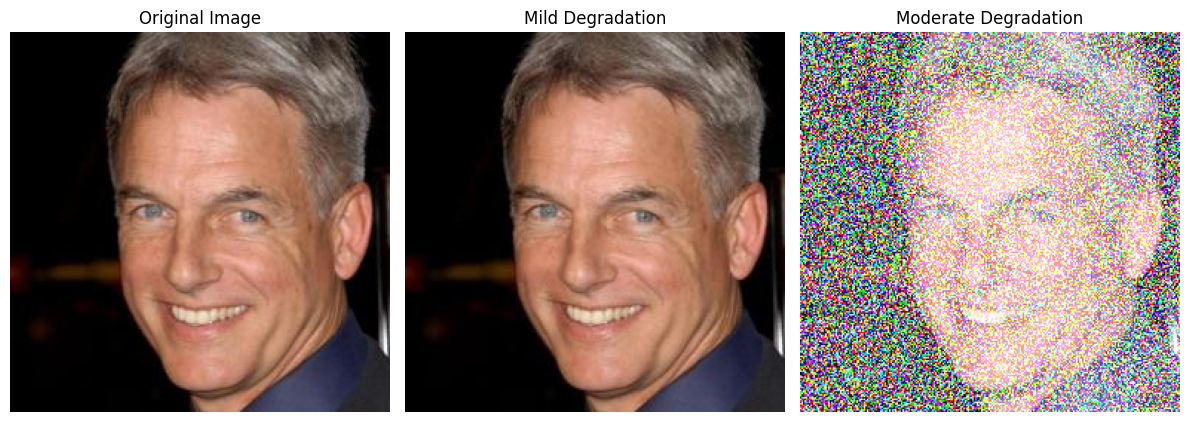

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
image_path = "celebA/celeba_hq_256/29972.jpg"  # Replace with the path to your image
original_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if original_image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to RGB (Matplotlib uses RGB format, OpenCV uses BGR)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Apply degradations
mild_degraded = apply_degradation(original_image, degradation_type="mild")
moderate_degraded = apply_degradation(original_image, degradation_type="moderate")

# Convert degraded images to RGB for Matplotlib
mild_degraded_rgb = cv2.cvtColor(mild_degraded, cv2.COLOR_BGR2RGB)
moderate_degraded_rgb = cv2.cvtColor(moderate_degraded, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")

# Mild degradation
plt.subplot(1, 3, 2)
plt.imshow(mild_degraded_rgb)
plt.title("Mild Degradation")
plt.axis("off")

# Moderate degradation
plt.subplot(1, 3, 3)
plt.imshow(moderate_degraded_rgb)
plt.title("Moderate Degradation")
plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()